# Assignment 3: Reinforcement Learning Pipeline in Practice


*2022-2023 fall quarter, CS269 Seminar 5: Reinforcement Learning. Department of Computer Science at University of California, Los Angeles. Course Instructor: Professor Bolei ZHOU. Assignment Author: Zhenghao PENG.*

-----



> NOTE: **We only grade your assignment based on the report PDF file and python files. You can do whatever you like in this notebook! Running all cells in this jupyter notebook does not generate all reqiured figures in result.md**


(`README.md` and the intro of `assignment3.ipynb` are identical)

Welcome to the assignment 3 of our RL course!


Different from the previous assignment, this assignment requires you to finish codes mainly in python files instead of in a jupyter notebook. The provided jupyter notebook only walks you through the training and post-processing procedure based on those python files. 


This assignment is highly flexible. You are free to do hyper-parameter searching or improve your implementation by introducing new components. You are encouraged to survey materials in the internet that explain the mechanisms of these classic algorithms. As a start point, [Spinning Up](https://spinningup.openai.com/en/latest/) might be a good choice.



### Grading Scheme

We required you to finish the following tasks:

* Task 1: Implement TD3Trainer **(30/100 points)**
* Task 2: Implement PPOTrainer **(20/100 points)**
* Task 3: Implement GAILTrainer **(20/100 points)**
* Task 4: Conduct RL generalization experiments on one of the algorithms implemented **(30/100 points)**
* Task 5: Conduct RL generalization experiments on another one of the algorithms implemented **(Bonus 20 points)**
* Task 6: Conduct generalization experiments on GAIL that boosts the test performance. You can train and plug in a better PPO agent as the expert or adjust the hyper-pameters. The best agent in these experiments should has > 200 reward. **(Bonus 20 points)**




Therefore the possible maximum grade will be 140 points.


### Summary of Experiments

**Group 1: Baselines**

1. TD3 in Pendulum-v0
2. TD3 in MetaDrive-Tut-Easy-v0
3. PPO in CartPole-v0
4. PPO in MetaDrive-Tut-Easy-v0
5. GAIL in MetaDrive-Tut-Easy-v0

**Group 2: RL Generalization Experiments**

Choose one of TD3, PPO or GAIL, conduct generalization experiments (see "Training and test environments"). 


Bonus 20 points: Run generalization experiments on another algorithm that you are not chosen in above experiment. You need to train 6 agents in this case.




### Deliverables

The exported **PDF file** of the `result.md`: You will use the provided `result.md` and attach the required figures in it and then generate a PDF file. Please visit the `result.md` for details.

Compress all files in `assignment3` and prepares a **ZIP file**. No rar or other format.

You need to submit **both the zip file and the pdf file** to bruinlearn.


### File structure

You need to pay attention to the files below:

1. `train.py` - Train scripts for PPO in CartPole-v0 and MetaDrive. Please implement `train`.
4. `core/ppo_trainer.py` - PPO algorithm. Please implement `compute_action` and `compute_loss`.
5. `core/buffer.py` - Supporting data structure for PPO (GAE is implemented here). Please implement `compute_returns` for PPO.
6. `core/td3_trainer.py` - File which can be directly run to train TD3. Please implement TD3 here.
7. `assignment3.ipynb` - Useful jupyter notebook to walk you through the whole assignment. Unlike previous work, you are not required to fill anything in this notebook (but you can use it to do whatever you like). 
8. `result.md` - A **template** file for your final submission. You need to **generate a PDF file** based on it after attaching images in it. 
9. `[train|eval]_[ppo|gail|td3].py` and `[ppo|gail|td3]_generalization_[eval|train].sh` - Reference files that can be used to debug quickly or conduct formal experiments in batch.



### Training and test environments

We prepared a set of pre-defined MetaDrive environments to train your agents. 

The first is `MetaDrive-Tut-Easy-v0`, which only has one map with only a straight road.

We also prepare a set of environments for RL generalization experiments.

Concretely, we will use a training environment to train the RL agent and 
use a separate test environment `MetaDrive-Tut-Test-v0` to run the RL agent.
You can choose on of those training environments: 

* `MetaDrive-Tut-1Env-v0`
* `MetaDrive-Tut-5Env-v0`
* `MetaDrive-Tut-10Env-v0`
* `MetaDrive-Tut-20Env-v0`
* `MetaDrive-Tut-50Env-v0`
* `MetaDrive-Tut-100Env-v0`

Those training environment contain [1, 5, 10, 20, 50, 100] unique traffic scenarios, respectively. And the test environment contains 20 unique traffic scenarios which are unique to those in the training environments. 

By training a set of RL agents in different training environments and test them in the same test environment, we can examine the influence of the diversity of scenarios in the training environments. We expect to see that when using a training environment with more diverse data, the test performance of the trained agent should be improved, meaning it has better generalization ability.


**Please note that each MetaDrive can only run in single process. If you encounter any environmental error, please firstly try to restart the notebook and rerun the cell.**



### Notes

1. We use multi-processing to enable asynchronous data sampling. Therefore in many places the tensors have shape `[num_steps, num_envs, num_feat]`. This means that `num_envs` environments are running concurrently and each of them samples a fragment of trajectory with length `num_steps`. There are totally `num_steps*num_envs` transitions are generated in each training iteration.


2. Each process can only have a single MetaDrive environment. 


3. The jupyter notebook is used for tutorial and visualization. It is optional for you to use the notebook to train agents or visualize results.


### Colab supporting

Though we use multiple files to implement algorithms, we can still leverage Colab to access computing resources. 

* Step 1: Create a folder in your Google Drive root named `cs269`
* Step 2: Upload the files in `assignment3` folder such as `train_ppo.py` and the folder `core` to `cs269` folder in your Google Drive.
* Step 3: Run the last cell in Demo 1.



## Demo 1: Setup dependencies

In [1]:
!pip install torch

# Install MetaDrive, a lightweight driving simulator
!pip install git+https://github.com/metadriverse/metadrive

# Test whether MetaDrive is properly installed. No error means the test is passed.
!python -m metadrive.examples.profile_metadrive --num-steps 100

!pip install pandas scipy seaborn tabulate pyyaml

# Update(2022-11-03): Fix pyglet compatability issue since it is updated to 2.0.0 recently.
!pip install "pyglet<2.0.0"

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/metadriverse/metadrive to /tmp/pip-req-build-u6_tpstd
  Running command git clone --filter=blob:none --quiet https://github.com/metadriverse/metadrive /tmp/pip-req-build-u6_tpstd
  Resolved https://github.com/metadriverse/metadrive to commit 78ee891904ed70c3277971a563cb3807a614a38c
  Preparing metadata (setup.py) ... done
Successfully registered the following environments: ['MetaDrive-validation-v0', 'MetaDrive-10env-v0', 'MetaDrive-100envs-v0', 'MetaDrive-1000envs-v0', 'SafeMetaDrive-validation-v0', 'SafeMetaDrive-10env-v0', 'SafeMetaDrive-100envs-v0', 'SafeMetaDrive-1000envs-v0', 'MARLTollgate-v0', 'MARLBottleneck-v0', 'MARLRoundabout-v0', 'MARLIntersection-v0', 'MARLParkingLot-v0', 'MARLMetaDrive-v0'].
Start to profile the efficiency of MetaDrive with 1000 maps and ~8 vehicles!
Finish 100/100 simulation steps. 

In [ ]:
import os
try:
    
    from google.colab import drive
    drive.mount('/content/gdrive')

    DRIVE_PATH = '/content/gdrive/My\ Drive/cs269'
    DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
    if not os.path.exists(DRIVE_PYTHON_PATH):
      %mkdir $DRIVE_PATH

    ## the space in `My Drive` causes some issues,
    ## make a symlink to avoid this
    SYM_PATH = '/content/cs269'
    if not os.path.exists(SYM_PATH):
      !ln -s $DRIVE_PATH $SYM_PATH
    
    running_in_colab = True
    
    # We already mounted in our google drive.
    # Enter the foler where you put files in:
    %cd '/content/cs269'

    # Current working directory:
    !pwd

    # What files are there:
    !ls
   
    
except ModuleNotFoundError:
    running_in_colab = False
    print(
        "I guess you are running locally. If you get this message in Colab, check the files."
    )


I guess you are running locally. If you get this message in Colab, check the files.


## Demo 2: Train a TD3 agent

Spinning Up tutorial provides great explaination on TD3 algorithm:
https://spinningup.openai.com/en/latest/algorithms/td3.html

Please implement all TODOs in `core/td3_trainer.py` and `train_td3.py`.

### Demo 2.1: Train TD3 agent in Pendulum-v0

In [8]:
!python train_td3.py \
--env-id Pendulum-v0 \
--log-dir Pendulum-v0 \
--max-steps 50000 \
--start-steps 1000 \
--lr 1e-3

/home/felix/Documents/GitHub/cs269_assignment-2022fall/assignment3/core
===== TD3 Training Step 1199 =====:
  actor_loss: 8.981341361999512
  critic_loss: 0.7059811949729919
  episode_reward: -1341.015319591831
  frame_per_second: 440
  log_dir: Pendulum-v0
  target_q: -9.20396614074707
  total_episodes: 6
  total_steps: 1199
  total_time: 2.7234396934509277

Trainer is saved at <Pendulum-v0/td3>. Progress is saved at <Pendulum-v0/td3/progress.csv>.
===== TD3 Training Step 2199 =====:
  actor_loss: 23.468189239501953
  critic_loss: 2.6662378311157227
  episode_reward: -1426.666162795794
  frame_per_second: 193
  log_dir: Pendulum-v0
  target_q: -23.698368072509766
  total_episodes: 11
  total_steps: 2199
  total_time: 11.356502771377563

===== TD3 Training Step 3199 =====:
  actor_loss: 37.553585052490234
  critic_loss: 22.464466094970703
  episode_reward: -1428.8844892611119
  frame_per_second: 167
  log_dir: Pendulum-v0
  target_q: -38.200286865234375
  total_episodes: 16
  total_ste

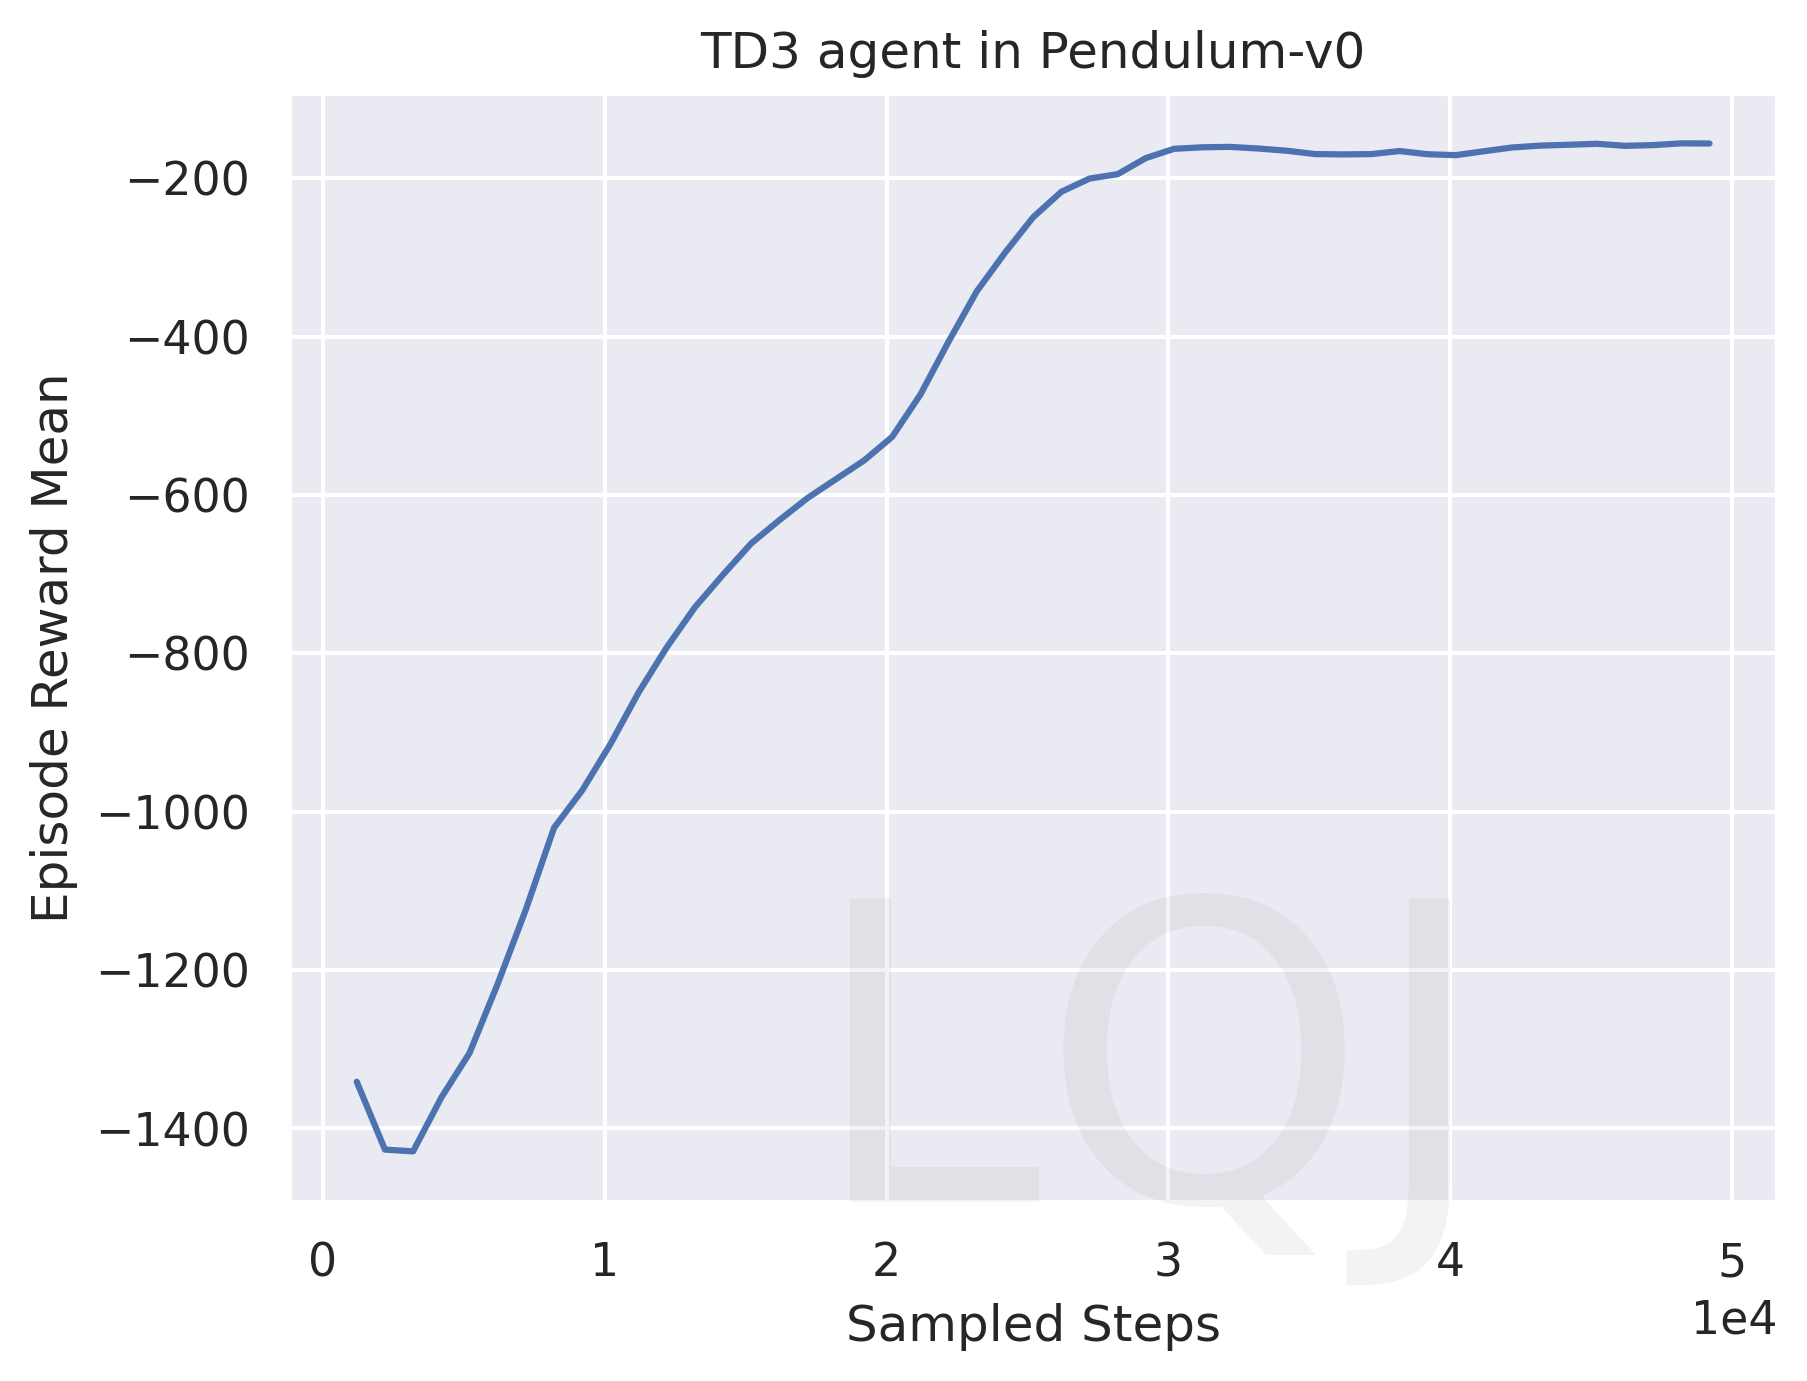

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("Pendulum-v0/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in Pendulum-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# You should remove this line in your code:
ax.annotate("LQJ", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('pendulum-td3.png', format='png', dpi=300, bbox_inches="tight")


### Demo 2.2: Train TD3 agent in MetaDrive-Tut-Easy-v0

When using default hyperparameters, I find TD3 fails to progress in this very simple environment. This might be caused by the overfitting issue --- the training data to the value network is lack of diversity, so it remembers firmly that the state values should around 0. This destroies the training of policy. To overcome this, I increase exporation noise, reduce the training batch size and also shrink the size of warmup data by decreasing `start_steps`.

In [12]:
!python train_td3.py \
--env-id MetaDrive-Tut-Easy-v0 \
--log-dir MetaDrive-Tut-Easy-v0 \
--max-steps 100000 \
--start-steps 1000 \
--batch_size 64 \
--expl_noise 0.2

/home/felix/Documents/GitHub/cs269_assignment-2022fall/assignment3/core
Successfully registered the following environments: ['MetaDrive-validation-v0', 'MetaDrive-10env-v0', 'MetaDrive-100envs-v0', 'MetaDrive-1000envs-v0', 'SafeMetaDrive-validation-v0', 'SafeMetaDrive-10env-v0', 'SafeMetaDrive-100envs-v0', 'SafeMetaDrive-1000envs-v0', 'MARLTollgate-v0', 'MARLBottleneck-v0', 'MARLRoundabout-v0', 'MARLIntersection-v0', 'MARLParkingLot-v0', 'MARLMetaDrive-v0'].
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
===== TD3 Training Step 1004 =====:
  actor_loss: .nan
  critic_loss: 0.007856404408812523
  episode_reward: 2.582955851823842
  frame_per_second: 511
  log_dir: MetaDrive-Tut-Easy-v0
  success_rate: 0.0
  target_q: 0.01463987585157156
  total_episodes: 5
 

Index(['Unnamed: 0', 'log_dir', 'frame_per_second', 'episode_reward',
       'total_steps', 'total_episodes', 'total_time', 'actor_loss',
       'critic_loss', 'target_q', 'success_rate'],
      dtype='object')


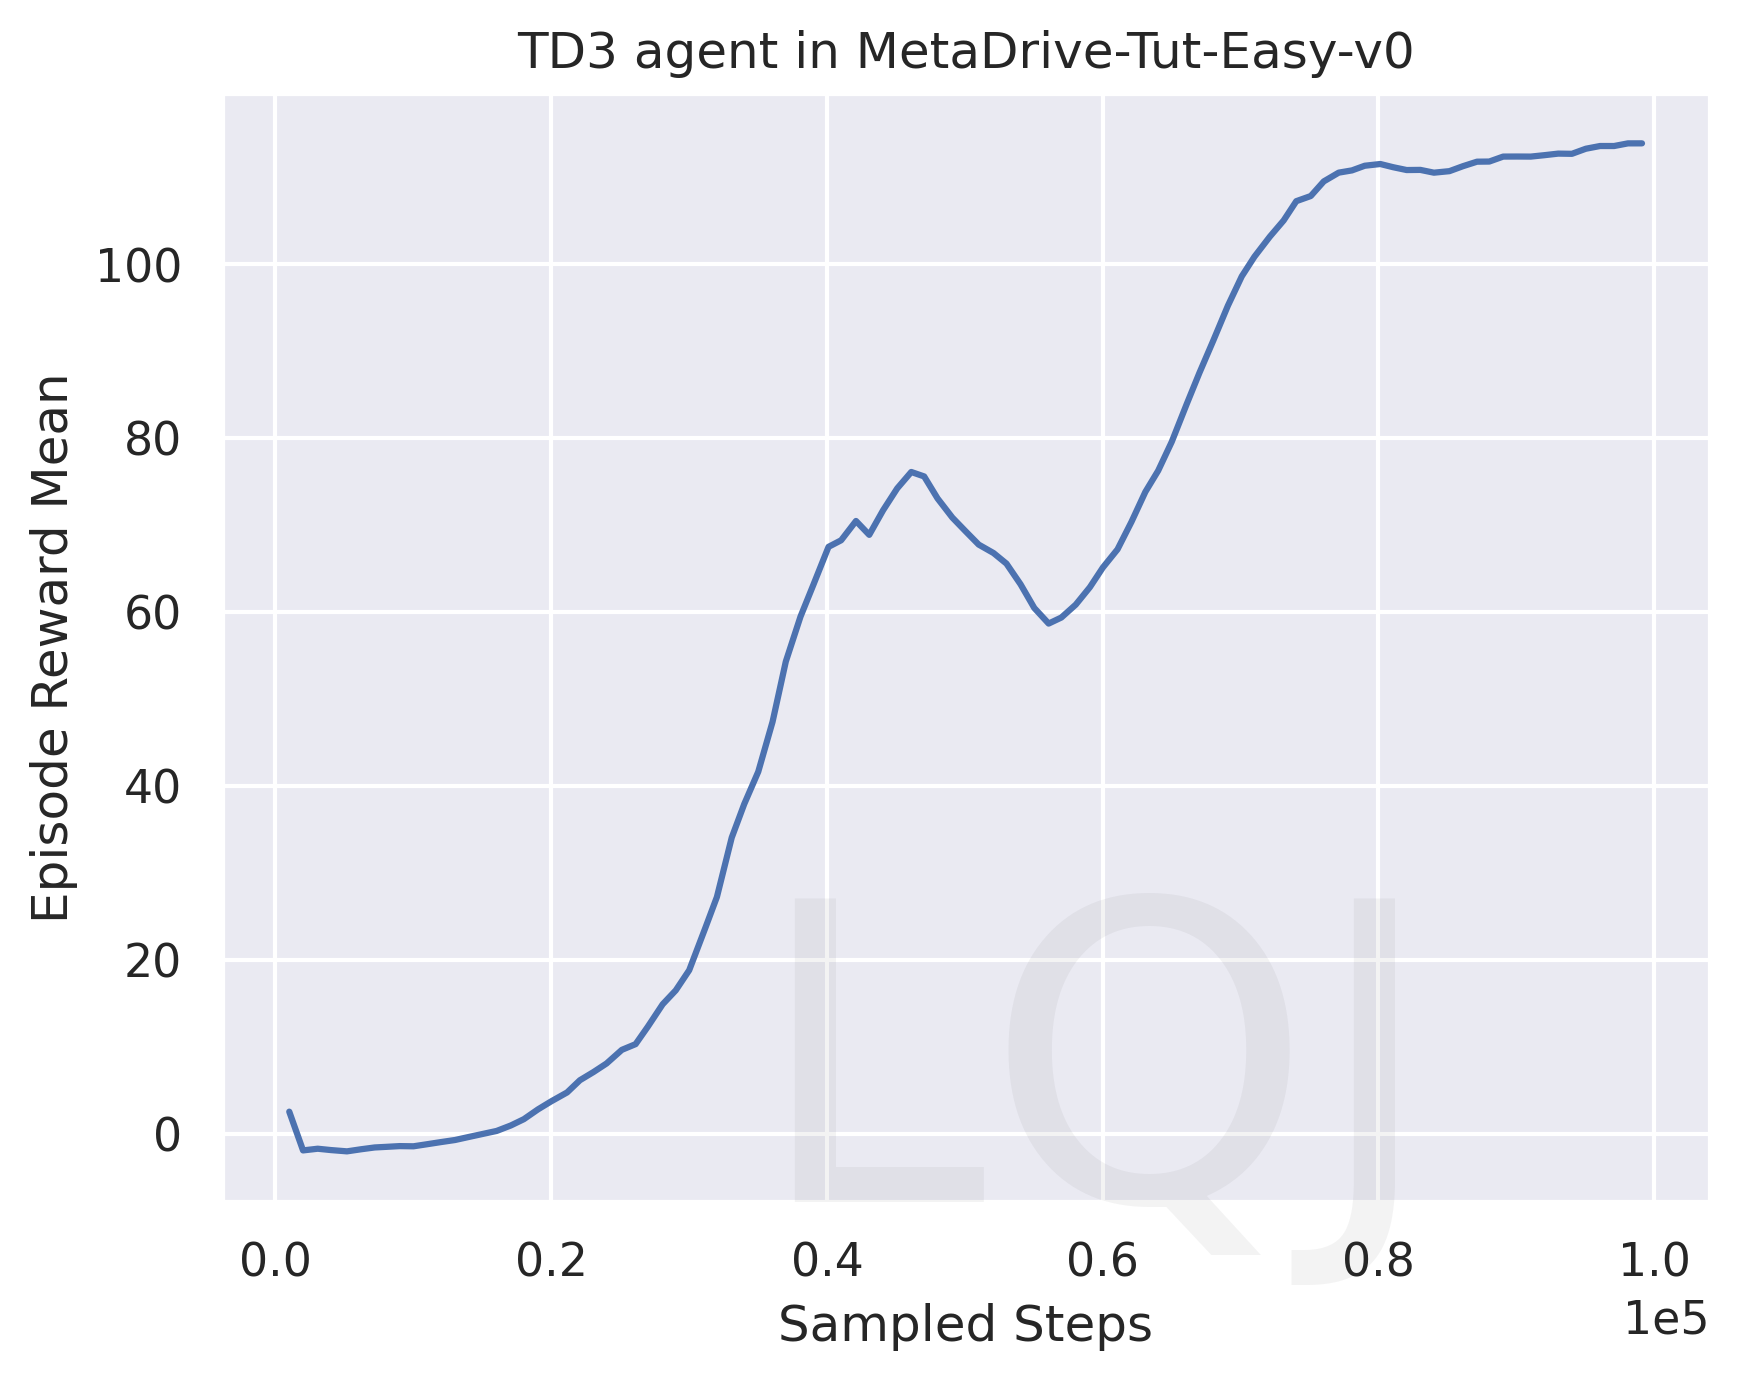

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-Tut-Easy-v0/td3/progress.csv")
print(progress.keys())
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in MetaDrive-Tut-Easy-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

ax.annotate("LQJ", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.savefig('metadrive-easy-td3.png', format='png', dpi=300, bbox_inches="tight")


## Demo 3: Train a PPO agent

You need to finish `core/ppo_trainer.py`, `core/buffer.py` and `train_ppo.py`.

Here we use GAE [1] (Generalized Advantage Estimation) to estimate the advantage. This technique is implemented in `PPORolloutStorage.compute_returns` in `core/buffer.py`. Concretely, we estimate the advantage of current state $t$ via:

$$\delta_t = r_t + \gamma V(s_{t+1}) - V(s_t)$$

$$A^{GAE}_t = \sum_{l=0}^{\infty} (\gamma \lambda) ^ l \delta_{t+l}$$

wherein $V$ is the state value function, $\lambda$ is a hyper-parameter defined in `PPOConfig["gae_lambda"]`.

You can find that when $\lambda = 0$, the GAE estimates advantage in an one-step TD manner. When $\lambda = 1$, the GAE reduces to Monte Carlo Estimation of the state value. Therefore by varying the $\lambda$, we can adjust the trade-off between the accuracy of the estimation (bias) and the variance of advantage.

[1]: Schulman, John , et al. "High-Dimensional Continuous Control Using Generalized Advantage Estimation." (2015).

### Demo 3.1 Train and draw the learning curve of PPO in CartPole

In [1]:
!python train_ppo.py \
--env-id CartPole-v0 \
--log-dir CartPole-v0 \
--num-envs 10 \
--max-steps 300000

/home/felix/Documents/GitHub/cs269_assignment-2022fall/assignment3/core
/home/felix/miniconda3/envs/cs269/lib/python3.9/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
/home/felix/Documents/GitHub/cs269_assignment-2022fall/assignment3/core
/home/felix/miniconda3/envs/cs269/lib/python3.9/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
/home/felix/Documents/GitH

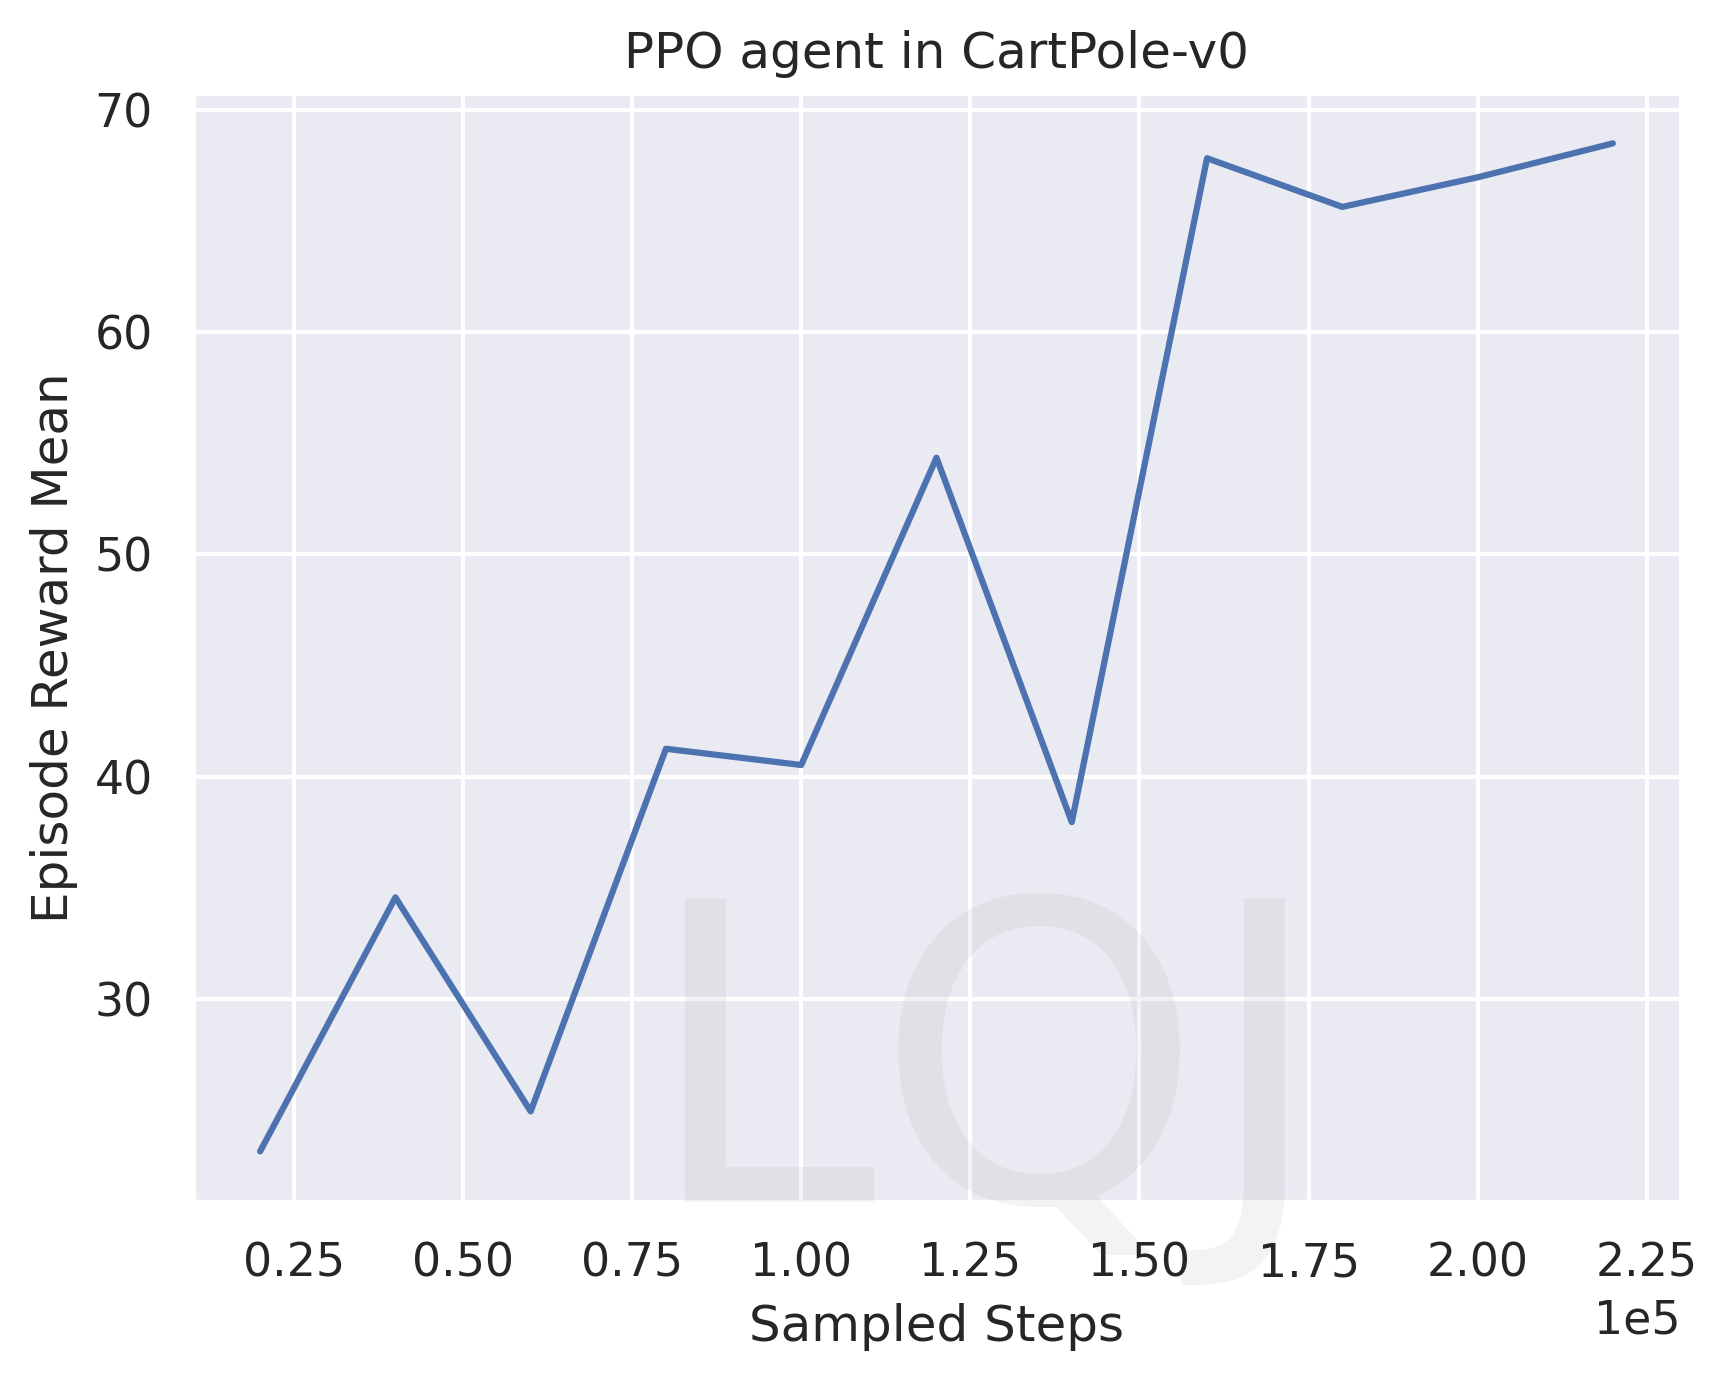

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("CartPole-v0/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in CartPole-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# You should remove this line in your code:
ax.annotate("LQJ", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('cartpole-ppo.png', format='png', dpi=300, bbox_inches="tight")


### Demo 3.2: Train and play with the PPO agent in MetaDrive Easy Env.

In [16]:
!python train_ppo.py \
  --env-id MetaDrive-Tut-Easy-v0 \
  --log-dir MetaDrive-Tut-Easy-v0 \
  --num-envs 10 \
  --max-steps 500000

/home/felix/Documents/GitHub/cs269_assignment-2022fall/assignment3/core
/home/felix/miniconda3/envs/cs269/lib/python3.9/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
/home/felix/Documents/GitHub/cs269_assignment-2022fall/assignment3/core
/home/felix/miniconda3/envs/cs269/lib/python3.9/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
/home/felix/Documents/GitH

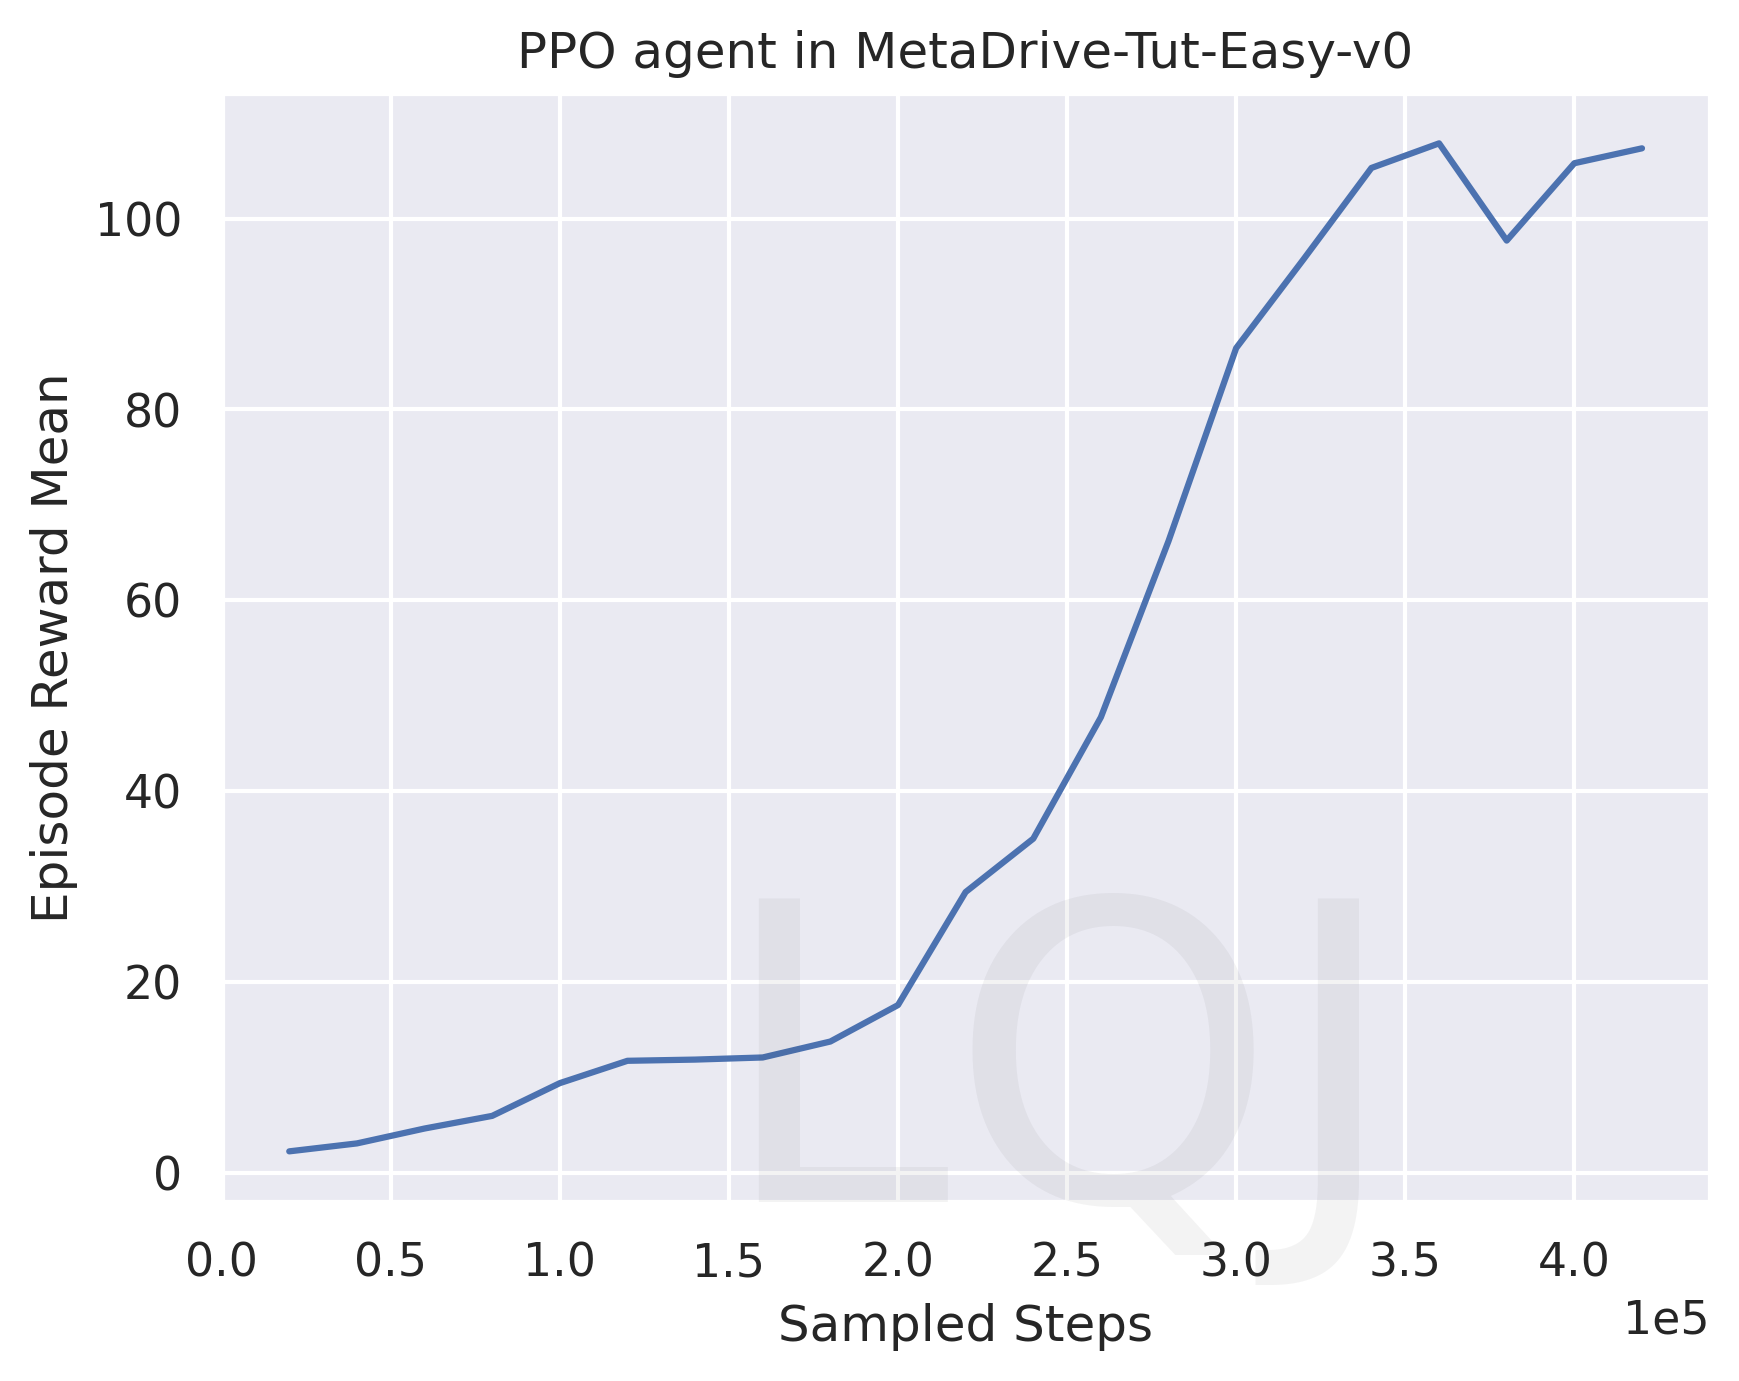

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("MetaDrive-Tut-Easy-v0/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in MetaDrive-Tut-Easy-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

ax.annotate("LQJ", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.savefig('metadrive-easy-ppo.png', format='png', dpi=300, bbox_inches="tight")


### Visualize the performance of PPO in MetaDrive Easy Env.

In [23]:
# Load the agent using PolicyAPI (easy to use interface to get policy)

from core.envs import make_envs
import gym
from vis import PPOPolicy, evaluate, animate
import pygame

env_name = "MetaDrive-Tut-Easy-v0"
policy = PPOPolicy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-Tut-Easy-v0/ppo/",
    suffix="final"
)


# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    env_name=env_name,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]

animate(frames, duration=0.01)

print("PPO agent achieves {} return in MetaDrive Easy environment.".format(eval_reward))

/home/felix/miniconda3/envs/cs269/lib/python3.9/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


/home/felix/Documents/GitHub/cs269_assignment-2022fall/assignment3/core
/home/felix/Documents/GitHub/cs269_assignment-2022fall/assignment3/core
pygame 2.1.2 (SDL 2.0.16, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html
Successfully registered the following environments: ['MetaDrive-validation-v0', 'MetaDrive-10env-v0', 'MetaDrive-100envs-v0', 'MetaDrive-1000envs-v0', 'SafeMetaDrive-validation-v0', 'SafeMetaDrive-10env-v0', 'SafeMetaDrive-100envs-v0', 'SafeMetaDrive-1000envs-v0', 'MARLTollgate-v0', 'MARLBottleneck-v0', 'MARLRoundabout-v0', 'MARLIntersection-v0', 'MARLParkingLot-v0', 'MARLMetaDrive-v0'].
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
Successfully load weights from /home/felix/Documents/GitHub/cs269_assign

error: No available video device

## Demo 4: GAIL agent

In [1]:
!python train_gail.py \
  --env-id MetaDrive-Tut-Easy-v0 \
  --log-dir MetaDrive-Tut-Easy-v0 \
  --num-envs 10 \
  --max-steps 1000000 \
  --expert-dataset-size 30000

/home/felix/Documents/GitHub/cs269_assignment-2022fall/assignment3/core
/home/felix/Documents/GitHub/cs269_assignment-2022fall/assignment3/core
/home/felix/miniconda3/envs/cs269/lib/python3.9/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
/home/felix/Documents/GitHub/cs269_assignment-2022fall/assignment3/core
/home/felix/Documents/GitHub/cs269_assignment-2022fall/assignment3/core
/home/felix/miniconda3/envs/cs269/lib/python3.9/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices 

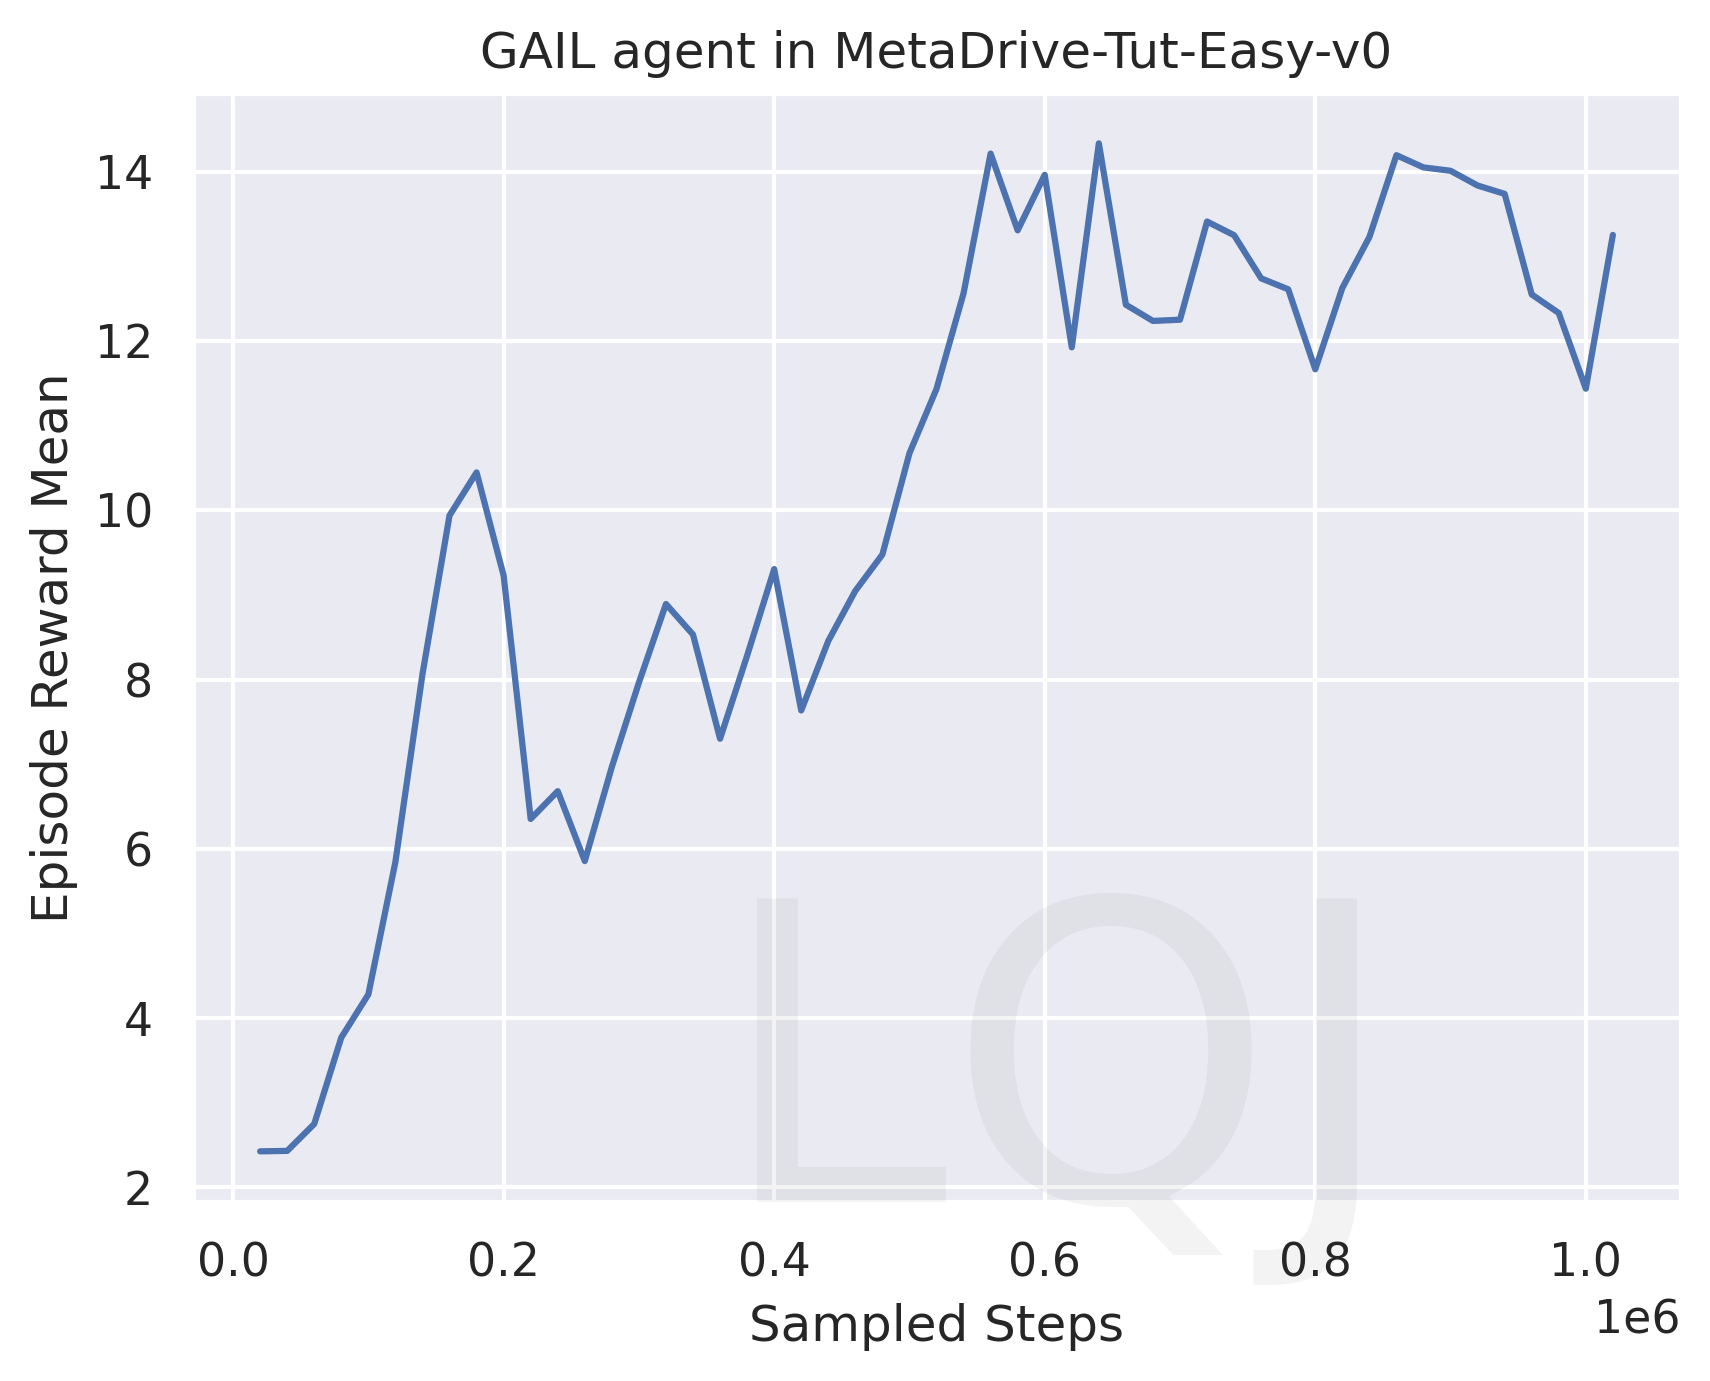

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("MetaDrive-Tut-Easy-v0/gail/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("GAIL agent in MetaDrive-Tut-Easy-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

ax.annotate("LQJ", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.savefig('metadrive-easy-gail.png', format='png', dpi=300, bbox_inches="tight")


## Demo 5: Generalization Experiments

Here we draw the figures of generalization experiments. You can always find that when training in the environment with only one sceanrio, the test performance is poor.

Due to computing resource limit, we do not require you to repeat the experiments for multiple time. This leads to huge instability in the performance. As you can see, in TD3 generalization experiments, when training with 20 traffic sceanrios, the training and test performance both drop. Repeating multiple times of experiments with different random seeds can relieve this issue.

We provide `train_[ppo|gail|td3].py`, `eval_[ppo|gail|td3].py`, `[ppo|gail|td3]_generalization_train.sh` and `[ppo|gail|td3]_generalization_eval.sh`. You can refer to them for more information.

You only need to pick one algorithm and run the generalization experiments. See `result.md` for more details.


References:

The Figure 8 in [MetaDrive paper](https://arxiv.org/pdf/2109.12674.pdf).

The Figure 2 in [ProcGen paper](http://proceedings.mlr.press/v97/cobbe19a/cobbe19a.pdf).



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y="training_episode_reward/episode_reward_mean"
# y="success_rate/success_rate_mean"
# y="learning_stats/entropy"
# y = "total_episodes"


plot_data = []

for env_num in [1, 5, 10, 20, 50, 100]:
    df = pd.read_csv("MetaDrive-Tut-{}Env-v0/td3/progress.csv".format(env_num))
    
    plot_data.append(dict(
        value=df.iloc[-1]["episode_reward"],
        env_num=env_num,
        label="Training"
    ))
    
    eval_df = pd.read_csv("MetaDrive-Tut-{}Env-v0/td3/eval_results.csv".format(env_num))
    
    plot_data.append(dict(
        value=eval_df["rewards"].mean(),
        env_num=env_num,
        label="Testing"
    ))
plot_data = pd.DataFrame(plot_data)
    

# df = pd.concat(dfs)
# df = df.reset_index()

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=plot_data,
    hue="label",
    x="env_num",
    y="value"
)
ax.set_title("TD3 generalization results")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Sampled Steps")
# ax.set_xlim(0, 1.1e6)
# ax.set_ylim(0, 8)
ax.legend(fontsize=8, loc="upper right")
ax.annotate("LQJ", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)



# # Note: The following figure is for reference used only, you don't have to repreduce it.

FileNotFoundError: [Errno 2] No such file or directory: 'MetaDrive-Tut-1Env-v0/td3/eval_results.csv'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y="training_episode_reward/episode_reward_mean"
# y="success_rate/success_rate_mean"
# y="learning_stats/entropy"
# y = "total_episodes"


plot_data = []

for env_num in [1, 5, 10, 20, 50, 100]:
    df = pd.read_csv("MetaDrive-Tut-{}Env-v0/ppo/progress.csv".format(env_num))
    
    plot_data.append(dict(
        value=df.iloc[-1]["episode_reward"],
        env_num=env_num,
        label="Training"
    ))
    
    eval_df = pd.read_csv("MetaDrive-Tut-{}Env-v0/ppo/eval_results.csv".format(env_num))
    
    plot_data.append(dict(
        value=eval_df["rewards"].mean(),
        env_num=env_num,
        label="Testing"
    ))
plot_data = pd.DataFrame(plot_data)
    

# df = pd.concat(dfs)
# df = df.reset_index()

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=plot_data,
    hue="label",
    x="env_num",
    y="value"
)
ax.set_title("PPO generalization results")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Sampled Steps")
ax.set_yscale('log')
# ax.set_xlim(0, 1.1e6)
# ax.set_ylim(0, 8)
ax.legend(fontsize=8, loc="upper right")
ax.annotate("LQJ", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)



# # Note: The following figure is for reference used only, you don't have to repreduce it.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y="training_episode_reward/episode_reward_mean"
# y="success_rate/success_rate_mean"
# y="learning_stats/entropy"
# y = "total_episodes"


plot_data = []

for env_num in [1, 5, 10, 20, 50, 100]:
    df = pd.read_csv("MetaDrive-Tut-{}Env-v0/gail/progress.csv".format(env_num))
    
    plot_data.append(dict(
        value=df.iloc[-1]["episode_reward"],
        env_num=env_num,
        label="Training"
    ))
    
    eval_df = pd.read_csv("MetaDrive-Tut-{}Env-v0/gail/eval_results.csv".format(env_num))
    
    plot_data.append(dict(
        value=eval_df["rewards"].mean(),
        env_num=env_num,
        label="Testing"
    ))
plot_data = pd.DataFrame(plot_data)
    

# df = pd.concat(dfs)
# df = df.reset_index()

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=plot_data,
    hue="label",
    x="env_num",
    y="value"
)
ax.set_title("GAIL generalization results")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Number of Training Scenarios")
# ax.set_xlim(0, 1.1e6)
# ax.set_ylim(0, 8)
ax.legend(fontsize=8, loc="upper right")
ax.annotate("LQJ", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)



# # Note: The following figure is for reference used only, you don't have to repreduce it.